In [ ]:
%pip install numpy matplotlib sympy sklearn tqdm

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
from nn2 import NeuNet, sigmoid, LayerModel, tanh
from numpy import array, ndarray, mean
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [3]:
def hot_encode(y: ndarray | list, n_class: int = 10) -> ndarray:
    "hot encode numbers as vector of probabilities"
    return array([[0.]*(num)+[1.]+[0.]*(n_class-num-1) for num in y])

In [4]:
def squared_mean(real: ndarray, ref: ndarray) -> float:
    "squared mean loss metric"
    assert(len(real) == len(ref))
    return mean((real-ref)**2)  # type: ignore

def abs_relative_sum(real: ndarray, ref: ndarray) -> float:
    "relative absolute error metric"
    assert(len(real) == len(ref))
    return np.sum(abs(real-ref)/ref)  # type: ignore

### load digits from mnist dataset

In [5]:
(data, target) = load_digits(n_class=10, return_X_y=True)
assert(isinstance(target, ndarray))
# hot encode outputs
target = hot_encode(target, n_class=10)
# modify data to fit expected format
data = 1.0-data/16.0
# split to train and test sets
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

### show first digit from dataset

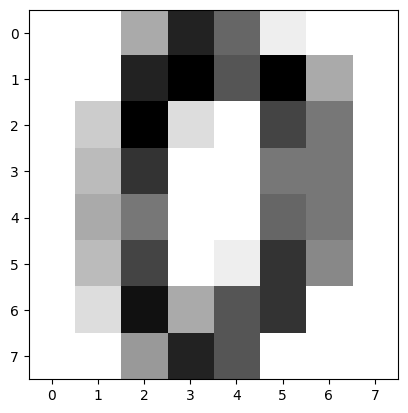

In [6]:
digit = Image.frombytes("L", (8, 8), (data*255).astype(np.uint8))
plt.imshow(digit, cmap='gray')  # type: ignore
plt.show()

### create neural network model with 2 dense layers and 64-dim vector input

In [7]:
h1 = LayerModel(20)
h1.activation(sigmoid)
h2 = LayerModel(10)
h2.activation(sigmoid)
nn = NeuNet(64)
nn.add_layer(h1)
nn.add_layer(h2)

### train neural network

In [8]:
nn.fit(x_train, y_train, learning_rate=4, passes=1000, batch_size=100, cross_validation=squared_mean)

Training: 100%|██████████| 1000/1000 [00:13<00:00, 76.28it/s, loss=1.87]


### predict output of first sample from train dataset

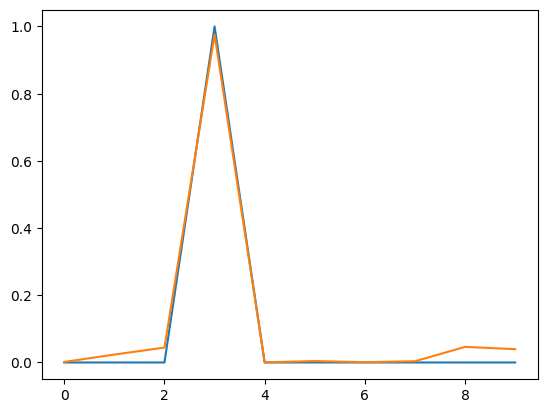

In [9]:
n=0
y = nn.predict(x_train[n])
plt.plot(y_train[n])
plt.plot(y)
plt.show()

### predict output of first sample from test dataset

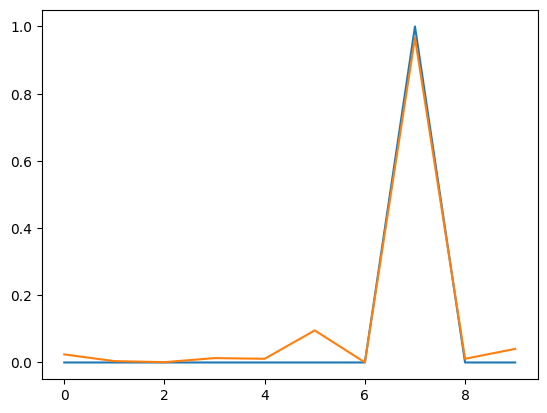

In [10]:
n=0
y = nn.predict(x_test[n])
plt.plot(y_test[n])
plt.plot(y)
plt.show()

### load images of hand-drawn digits from folder and show number 3

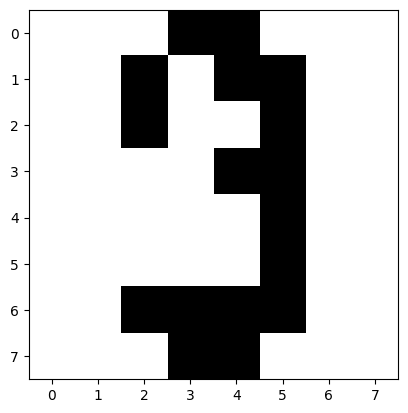

In [11]:
MAX_NUM = 6
MIN_NUM = 1
nums_test1 = {i: Image.open(f"font/{i}.bmp") for i in range(MIN_NUM, MAX_NUM+1)}

n = 2
plt.imshow(nums_test1[n+1], cmap='gray')   # type: ignore
plt.show()

### Generate datasets from loaded digits

In [12]:
x_test1 = array([
    num_img.getdata() for num_img in nums_test1.values()
])/255
y_test1 = hot_encode(list(nums_test1.keys()))

### Run prediction 

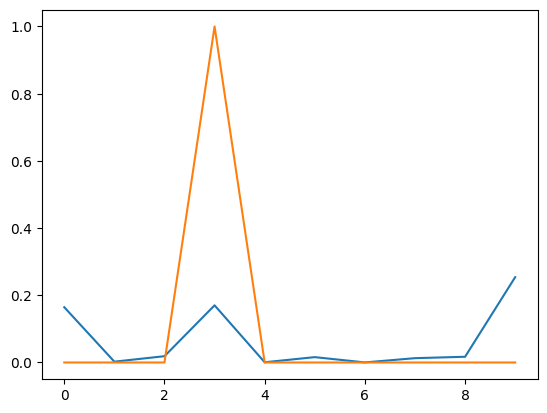

In [13]:
y = nn.predict(x_test1[n])
plt.plot(y)
plt.plot(y_test1[n])
plt.show()

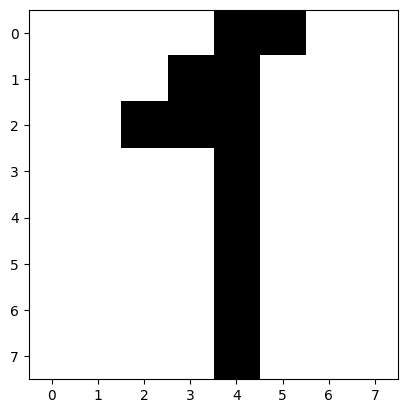

In [14]:
nums_test2 = {i: Image.open(f"font/{i}t.bmp") for i in range(MIN_NUM, MAX_NUM+1)}
plt.imshow(nums_test2[1], cmap='gray')   # type: ignore
plt.show()

In [15]:
x_test2 = array([
    num_img.getdata() for num_img in nums_test2.values()
])/255
y_test2 = hot_encode(list(nums_test2.keys()))

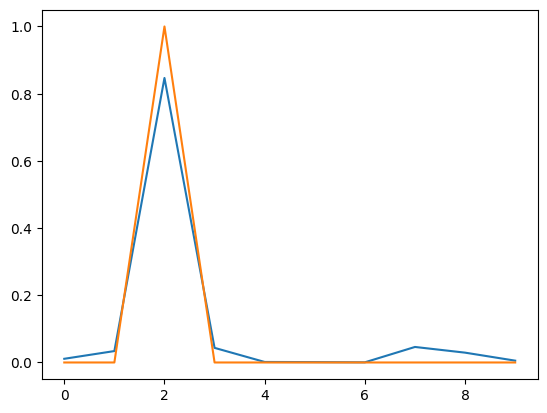

In [16]:
n=1
y = nn.predict(x_test2[n])
plt.plot(y)
plt.plot(y_test2[n])
plt.show()